In [ ]:
!pip install kmodes

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import os
import glob
import numpy as np

import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
"""
Numerical only: Elbow method - Calculate optimal number of clusters
"""
def calculate_wcss(data, clustMethod):
  wcss = []
  if clustMethod=='KMeans':
    for n in range(2, 15):
      kmeans = KMeans(n_clusters=n, random_state=42)
      kmeans.fit(X=data)
      wcss.append(kmeans.inertia_)
  
  elif clustMethod=='KPrototypes':
    for n in range(2, 15):
      kproto = KPrototypes(n_clusters=n, init='Huang', random_state=42)
      kproto.fit(X=data, categorical=[0,1,2])
      wcss.append(kproto.cost_)

  else:
    for n in range(2, 15):
      kmodes = KModes(n_clusters=n, init='Huang', random_state=42)
      kmodes.fit(X=data)
      wcss.append(kmodes.cost_)    

  return wcss
    
    
def optimal_number_of_clusters(wcss):
  x1, y1 = 2, wcss[0]
  x2, y2 = 20, wcss[len(wcss)-1]

  distances = []
  for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
    
  return distances.index(max(distances)) + 2

In [ ]:
pd.options.display.max_rows=4000
pd.options.display.max_columns= None

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#Data = pd.read_pickle('/content/drive/My Drive/data/DataCorrelation.pkl')

In [ ]:
Data = pd.read_pickle('/content/drive/My Drive/data/DataCorrelation2.pkl')

In [ ]:
Data = Data.drop(['Twitter Retweets'], axis=1)

In [ ]:
"""
Test Data

Data = Data.head(100)
"""

'\nTest Data\n\nData = Data.head(100)\n'

In [ ]:
Data.dtypes

Sentiment              object
Gender                 object
Impact                  int64
Kred Outreach           int64
Professions            object
Reach                   int64
Twitter Followers       int64
Twitter Following       int64
Twitter Reply Count     int64
Twitter Tweets          int64
dtype: object

In [ ]:
dfOrig = Data.copy()

In [ ]:
# Standardizing all the numerical variables
from sklearn import preprocessing
Num_features=Data.select_dtypes(include=[np.number]).columns
Cat_features = Data.select_dtypes(include=[np.object]).columns
print(Num_features)
print(Cat_features)
Data[Num_features]=preprocessing.MinMaxScaler().fit_transform(Data[Num_features])
#Data[Cat_features]=preprocessing.LabelEncoder().fit_transform(Data[Cat_features])
Data.head()


Index(['Impact', 'Kred Outreach', 'Reach', 'Twitter Followers',
       'Twitter Following', 'Twitter Reply Count', 'Twitter Tweets'],
      dtype='object')
Index(['Sentiment', 'Gender', 'Professions'], dtype='object')


,Sentiment,Gender,Impact,Kred Outreach,Professions,Reach,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Tweets
0,neutral,female,0.395062,0.000000,Student,0.000141,0.000022,0.000046,0.0,0.002374
1,negative,female,0.518519,0.000000,Student,0.000181,0.000238,0.000496,0.0,0.021837
2,neutral,female,0.333333,0.166667,Student,0.000117,0.000021,0.000042,0.0,0.001716
3,neutral,female,0.432099,0.333333,Student,0.000151,0.000088,0.000093,0.0,0.002275
4,positive,male,0.358025,0.000000,Student,0.000127,0.000010,0.000024,0.0,0.000159


In [ ]:

# Categorical boolean mask
categorical_feature_mask = Data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = Data.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
Data[categorical_cols] = Data[categorical_cols].apply(lambda col: le.fit_transform(col))
Data.head(3)


,Sentiment,Gender,Impact,Kred Outreach,Professions,Reach,Twitter Followers,Twitter Following,Twitter Reply Count,Twitter Tweets
0,1,0,0.395062,0.000000,11,0.000141,0.000022,0.000046,0.0,0.002374
1,0,0,0.518519,0.000000,11,0.000181,0.000238,0.000496,0.0,0.021837
2,1,0,0.333333,0.166667,11,0.000117,0.000021,0.000042,0.0,0.001716


In [ ]:
#Selection of variables for Kmodes Clustering Algorithm
Data_k= Data[['Sentiment', 'Gender', 'Professions']]
#Data_k = Data.copy()
print (Data_k.dtypes)

Sentiment      int64
Gender         int64
Professions    int64
dtype: object


In [ ]:
kmodes = KModes(n_clusters=11, init='Huang', random_state=42)
clusters = kmodes.fit_predict(Data_k)
Data_k['Cluster'] = clusters

1     36205
3     17775
9     15064
4      8278
0      6936
2      5858
8      4082
5      2685
10     2212
7      1267
6       955
Name: Cluster, dtype: int64


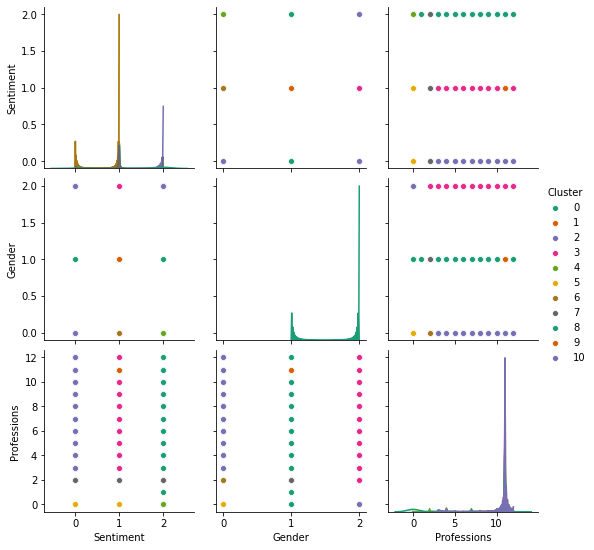

In [ ]:
#Visualize K-Modes clustering 
print (Data_k['Cluster'].value_counts())
sns.pairplot(Data_k,hue='Cluster',palette='Dark2',diag_kind='kde')

In [ ]:
#dataClusters = dfOrig.copy()
#dataClusters['Cluster']=clusters
#dataClusters.to_pickle("/content/drive/My Drive/data/kmodes_orig.pkl")
#Data_k.to_pickle("/content/drive/My Drive/data/kmodes_scaled.pkl")

In [ ]:
dfDummies = Data_k.copy()
#dfDummies = pd.concat((dfDummies, pd.get_dummies(dfDummies, columns=['Sentiment', 'Gender', 'Professions'], drop_first=True)),axis=1)
Data_k.head(1)
dfDummies.head(1)
dfDummies = pd.get_dummies(dfDummies, columns=['Sentiment', 'Gender', 'Professions'], prefix=['S', 'G', 'P'])
dfDummies.head(1)
#dfCat = pd.get_dummies(dfDummies['Sentiment', 'Gender', 'Professions'])
#dfCat.head()
#dfDummies = pd.concat([dfDummies.drop(['Sentiment', 'Gender', 'Professions'], axis=1), pd.get_dummies(dfDummies['Sentiment', 'Gender', 'Professions'])], axis=1)
#dfDummies.head()

dfDummies = dfDummies.rename(columns={'S_0':'Sent_negative', 'S_1':'Sent_neutral', 'S_2':'Sent_positive', 'G_0':'female', 'G_1':'male', 'G_2':'gender_unk', \
                                      'P_0': 'Artist', 'P_1':'Emerg_worker', 'P_2':'Executive', 'P_3':'Health_prac', 'P_4':'Journalist', 'P_5':'Legal', \
                                      'P_6':'Politician', 'P_7':'PR', 'P_8':'Scientist', 'P_9':'IT', 'P_10':'Sportsperson', 'P_11':'Student', 'P_12':'Teacher'})


In [ ]:
df_mean = dfDummies.copy()
#df_mean = (df_mean.loc[df_mean['Cluster_id_K_Prototype'], :].groupby('Cluster_id_K_Prototype').mean())
df_mean = df_mean.groupby('Cluster').mean()

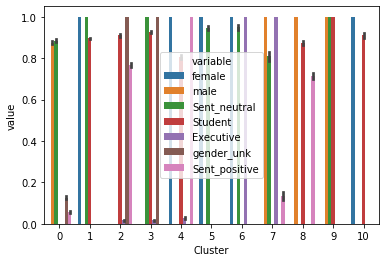

In [ ]:
dfPCA = dfDummies.copy()
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[0:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values(
        'Var', ascending=False,
    ).head(7).Variable.values) + ['Cluster']
tidy = dfDummies[selected_columns].melt(id_vars='Cluster')
sns.barplot(x='Cluster', y='value', hue='variable', data=tidy)